In [5]:
import pandas as pd
from pandasql import sqldf


In [2]:
df = pd.read_csv("final_output.csv")
df


,team,role
0,1,9
1,1,6
2,1,2
3,1,5
4,1,8
...,...,...
485,98,9
486,98,3
487,98,10
488,98,6


In [4]:
df['line'] = df['role'].apply(lambda x: 'front' if x <= 3 else 'back' if x <= 6 else 'mid')
df


,team,role,line
0,1,9,mid
1,1,6,back
2,1,2,front
3,1,5,back
4,1,8,mid
...,...,...,...
485,98,9,mid
486,98,3,front
487,98,10,mid
488,98,6,back


In [7]:
result = sqldf("""
SELECT
  team,
  SUM(CASE WHEN line = 'mid' THEN 1 ELSE 0 END) AS mids,
  SUM(CASE WHEN line = 'back' THEN 1 ELSE 0 END) AS backs,
  SUM(CASE WHEN line = 'front' THEN 1 ELSE 0 END) AS fronts
FROM df
GROUP BY 1
""", locals())
result.to_csv("see_result.csv", index=False)
result

,team,mids,backs,fronts
0,1,2,2,1
1,2,1,2,2
2,3,2,1,2
3,4,2,2,1
4,5,2,2,1
...,...,...,...,...
93,94,1,2,2
94,95,1,2,2
95,96,2,2,1
96,97,3,0,2


In [8]:
result2 = sqldf("""
SELECT
mids,
backs,
fronts,
count(*) n
FROM
    (SELECT
      team,
      SUM(CASE WHEN line = 'mid' THEN 1 ELSE 0 END) AS mids,
      SUM(CASE WHEN line = 'back' THEN 1 ELSE 0 END) AS backs,
      SUM(CASE WHEN line = 'front' THEN 1 ELSE 0 END) AS fronts
    FROM df
    GROUP BY 1
    ) a
GROUP BY 1,2,3 ORDER BY 4 DESC
""", locals())
result2.to_csv("see_result2.csv", index=False)
result2

,mids,backs,fronts,n
0,2,2,1,28
1,1,2,2,22
2,2,1,2,11
3,0,2,3,9
4,3,1,1,7
5,1,1,3,5
6,1,3,1,5
7,3,2,0,4
8,0,3,2,2
9,0,1,4,1


In [9]:
result3 = sqldf("""
SELECT
mids,
backs,
fronts,
enchanters,
count(*) n
FROM
    (SELECT
      team,
      SUM(CASE WHEN line = 'mid' THEN 1 ELSE 0 END) AS mids,
      SUM(CASE WHEN line = 'back' THEN 1 ELSE 0 END) AS backs,
      SUM(CASE WHEN line = 'front' THEN 1 ELSE 0 END) AS fronts,
      SUM(CASE WHEN role = 4 THEN 1 ELSE 0 END) AS enchanters
    FROM df
    GROUP BY 1
    ) a
GROUP BY 1,2,3,4 ORDER BY 5 DESC
""", locals())
result3.to_csv("see_result3.csv", index=False)
result3


,mids,backs,fronts,enchanters,n
0,2,2,1,0,26
1,1,2,2,0,21
2,2,1,2,0,11
3,0,2,3,0,9
4,3,1,1,0,6
5,1,1,3,0,5
6,1,3,1,0,5
7,3,2,0,0,4
8,2,2,1,1,2
9,0,1,4,0,1


In [29]:
result4 = sqldf("""
SELECT
in_role,
count(*) n
FROM
    (SELECT
      team,
      SUM(CASE WHEN role = 9 THEN 1 ELSE 0 END) AS in_role
    FROM df
    GROUP BY 1
    ) a
GROUP BY 1 ORDER BY 2 DESC
""", locals())
result4.to_csv("see_result4.csv", index=False)
result4


,in_role,n
0,0,53
1,1,41
2,2,4


In [24]:
import numpy as np
np.cumsum(df.role.value_counts(normalize=True))

6     0.212245
2     0.367347
5     0.508163
1     0.612245
9     0.712245
7     0.783673
3     0.851020
8     0.914286
11    0.963265
10    0.989796
4     1.000000
Name: role, dtype: float64

In [36]:
result5 = sqldf("""
SELECT
role1,
role2,
role3,
role4,
role5,
role6,
role7,
role8,
role9,
role10,
role11
FROM
    (SELECT
      team,
      SUM(CASE WHEN role = 1 THEN 1 ELSE 0 END) AS role1,
      SUM(CASE WHEN role = 2 THEN 1 ELSE 0 END) AS role2,
      SUM(CASE WHEN role = 3 THEN 1 ELSE 0 END) AS role3,
      SUM(CASE WHEN role = 4 THEN 1 ELSE 0 END) AS role4,
      SUM(CASE WHEN role = 5 THEN 1 ELSE 0 END) AS role5,
      SUM(CASE WHEN role = 6 THEN 1 ELSE 0 END) AS role6,
      SUM(CASE WHEN role = 7 THEN 1 ELSE 0 END) AS role7,
      SUM(CASE WHEN role = 8 THEN 1 ELSE 0 END) AS role8,
      SUM(CASE WHEN role = 9 THEN 1 ELSE 0 END) AS role9,
      SUM(CASE WHEN role = 10 THEN 1 ELSE 0 END) AS role10,
      SUM(CASE WHEN role = 11 THEN 1 ELSE 0 END) AS role11
    FROM df
    GROUP BY 1
    ) a
""", locals())
result5.to_csv("see_result5.csv", index=False)
result5


,role1,role2,role3,role4,role5,role6,role7,role8,role9,role10,role11
0,0,1,0,0,1,1,0,1,1,0,0
1,1,1,0,0,0,2,0,0,0,1,0
2,1,0,1,0,0,1,0,0,1,0,1
3,0,1,0,0,1,1,0,1,0,0,1
4,0,1,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
93,1,1,0,0,1,1,0,0,1,0,0
94,0,1,1,0,0,2,1,0,0,0,0
95,1,0,0,0,1,1,0,0,1,0,1
96,1,1,0,0,0,0,0,1,1,0,1


In [39]:
result5.corr()

,role1,role2,role3,role4,role5,role6,role7,role8,role9,role10,role11
role1,1.000000,-0.273904,0.155695,-0.125287,-0.134729,-0.002961,-0.421666,-0.374943,0.044823,-0.038825,-0.018600
role2,-0.273904,1.000000,-0.392219,0.148484,-0.077412,-0.122280,0.081558,0.097954,-0.427696,-0.094470,-0.020799
role3,0.155695,-0.392219,1.000000,-0.146365,-0.085635,0.053209,-0.169753,-0.264845,-0.215906,0.147888,-0.087873
role4,-0.125287,0.148484,-0.146365,1.000000,0.044555,-0.280601,-0.067566,0.041720,-0.040264,0.046037,0.079366
role5,-0.134729,-0.077412,-0.085635,0.044555,1.000000,-0.437321,-0.062276,0.227415,-0.124242,-0.069491,0.004603
role6,-0.002961,-0.122280,0.053209,-0.280601,-0.437321,1.000000,-0.003798,-0.305180,0.049797,-0.329546,-0.331281
role7,-0.421666,0.081558,-0.169753,-0.067566,-0.062276,-0.003798,1.000000,-0.165661,-0.115002,0.019923,-0.149135
role8,-0.374943,0.097954,-0.264845,0.041720,0.227415,-0.305180,-0.165661,1.000000,-0.019051,-0.007261,0.068188
role9,0.044823,-0.427696,-0.215906,-0.040264,-0.124242,0.049797,-0.115002,-0.019051,1.000000,-0.078358,-0.156415
role10,-0.038825,-0.094470,0.147888,0.046037,-0.069491,-0.329546,0.019923,-0.007261,-0.078358,1.000000,-0.078582


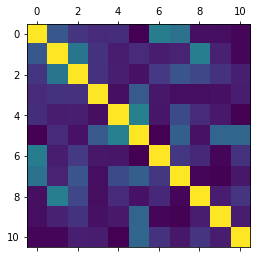

In [38]:
import matplotlib.pyplot as plt

plt.matshow(result5.corr().abs())
plt.show()
# 1, 7 inverse correlated
# 1, 8 inverse correlated
# 2, 3 inverse correlated
# 2, 9 inverse correlated
# 5, 6 inverse correlated


# If no engagement tank, then usually a warden tank or catcher engager
# If no diver, then probably a melee or juggernaut
# If no ADC then more commonly a mage



In [42]:
result5 = sqldf("""
SELECT
role1,
role8,
count(*)
FROM
    (SELECT
      team,
      SUM(CASE WHEN role = 1 THEN 1 ELSE 0 END) AS role1,
      SUM(CASE WHEN role = 2 THEN 1 ELSE 0 END) AS role2,
      SUM(CASE WHEN role = 3 THEN 1 ELSE 0 END) AS role3,
      SUM(CASE WHEN role = 4 THEN 1 ELSE 0 END) AS role4,
      SUM(CASE WHEN role = 5 THEN 1 ELSE 0 END) AS role5,
      SUM(CASE WHEN role = 6 THEN 1 ELSE 0 END) AS role6,
      SUM(CASE WHEN role = 7 THEN 1 ELSE 0 END) AS role7,
      SUM(CASE WHEN role = 8 THEN 1 ELSE 0 END) AS role8,
      SUM(CASE WHEN role = 9 THEN 1 ELSE 0 END) AS role9,
      SUM(CASE WHEN role = 10 THEN 1 ELSE 0 END) AS role10,
      SUM(CASE WHEN role = 11 THEN 1 ELSE 0 END) AS role11
    FROM df
    GROUP BY 1
    ) a
group by 1,2 order by 3 desc
""", locals())
result5.to_csv("see_result5.csv", index=False)
result5


,role1,role8,count(*)
0,1,0,37
1,0,0,26
2,0,1,26
3,1,1,4
4,2,0,4
5,2,1,1


In [66]:
result6 = sqldf("""
SELECT
adc,
mage_or_assassin,
support,
diver_or_fighter_or_juggernaut,
vanguard,
battlemage,
count(*)
FROM
    (SELECT
      team,
      SUM(CASE WHEN role IN (5) THEN 1 ELSE 0 END) AS adc,
      SUM(CASE WHEN role IN (11,6) THEN 1 ELSE 0 END) AS mage_or_assassin,
      SUM(CASE WHEN role IN (4,7,8) THEN 1 ELSE 0 END) AS support,
      SUM(CASE WHEN role IN (3,2,9) THEN 1 ELSE 0 END) AS diver_or_fighter_or_juggernaut,
      SUM(CASE WHEN role IN (1) THEN 1 ELSE 0 END) AS vanguard,
      SUM(CASE WHEN role IN (10) THEN 1 ELSE 0 END) AS battlemage
    FROM df
    GROUP BY 1
    ) a
group by 1,2,3,4,5,6 order by 7 desc
""", locals())
result6.to_csv("see_result6.csv", index=False)
result6


,adc,mage_or_assassin,support,diver_or_fighter_or_juggernaut,vanguard,battlemage,count(*)
0,1,1,1,2,0,0,19
1,1,1,0,2,1,0,10
2,0,2,0,2,1,0,9
3,0,2,1,2,0,0,6
4,1,2,0,1,1,0,6
5,1,2,1,1,0,0,6
6,1,1,2,1,0,0,5
7,0,1,2,2,0,0,3
8,1,1,0,1,2,0,3
9,1,1,1,1,1,0,3


In [44]:
result7 = sqldf("""
SELECT
role1,
role2,
role3,
role4,
role5,
role6,
role7,
role8,
role9,
role10,
role11,
count(*)
FROM
    (SELECT
      team,
      SUM(CASE WHEN role IN (5) THEN 1 ELSE 0 END) AS adc,
      SUM(CASE WHEN role IN (6) THEN 1 ELSE 0 END) AS mage,
      SUM(CASE WHEN role IN (1,7,8) THEN 1 ELSE 0 END) AS engagement_tank_warden_catcher,
      SUM(CASE WHEN role IN (2,9) THEN 1 ELSE 0 END) AS diver_or_fighter,
      SUM(CASE WHEN role = 1 THEN 1 ELSE 0 END) AS role1,
      SUM(CASE WHEN role = 2 THEN 1 ELSE 0 END) AS role2,
      SUM(CASE WHEN role = 3 THEN 1 ELSE 0 END) AS role3,
      SUM(CASE WHEN role = 4 THEN 1 ELSE 0 END) AS role4,
      SUM(CASE WHEN role = 5 THEN 1 ELSE 0 END) AS role5,
      SUM(CASE WHEN role = 6 THEN 1 ELSE 0 END) AS role6,
      SUM(CASE WHEN role = 7 THEN 1 ELSE 0 END) AS role7,
      SUM(CASE WHEN role = 8 THEN 1 ELSE 0 END) AS role8,
      SUM(CASE WHEN role = 9 THEN 1 ELSE 0 END) AS role9,
      SUM(CASE WHEN role = 10 THEN 1 ELSE 0 END) AS role10,
      SUM(CASE WHEN role = 11 THEN 1 ELSE 0 END) AS role11      
    FROM df
    GROUP BY 1
    ) a
WHERE adc >= 1 and mage >= 1 and engagement_tank_warden_catcher >= 1 and diver_or_fighter >= 1
group by 1,2,3,4,5,6,7,8,9,10,11 order by 12 desc
""", locals())
result7.to_csv("see_result7.csv", index=False)
result7


,role1,role2,role3,role4,role5,role6,role7,role8,role9,role10,role11,count(*)
0,0,1,0,0,1,1,0,1,1,0,0,7
1,1,1,0,0,1,1,0,0,1,0,0,5
2,1,0,0,0,1,1,0,0,1,0,1,3
3,1,2,0,0,1,1,0,0,0,0,0,3
4,0,1,0,0,1,1,1,0,1,0,0,2
5,0,1,0,0,1,1,1,1,0,0,0,2
6,0,1,0,0,1,2,0,1,0,0,0,2
7,0,1,1,0,1,1,1,0,0,0,0,2
8,1,0,0,0,1,1,1,0,1,0,0,2
9,0,0,0,0,1,1,0,1,2,0,0,1


In [52]:
result6 = sqldf("""
SELECT
adc,
mage,
assassin,
engagement_tank_warden_catcher,
diver_or_fighter,
other,
count(*)
FROM
    (SELECT
      team,
      SUM(CASE WHEN role IN (5) THEN 1 ELSE 0 END) AS adc,
      SUM(CASE WHEN role IN (6) THEN 1 ELSE 0 END) AS mage,
      SUM(CASE WHEN role IN (11) THEN 1 ELSE 0 END) AS assassin,
      SUM(CASE WHEN role IN (1,7,8) THEN 1 ELSE 0 END) AS engagement_tank_warden_catcher,
      SUM(CASE WHEN role IN (2,9) THEN 1 ELSE 0 END) AS diver_or_fighter,
      SUM(CASE WHEN role IN (3,4,10) THEN 1 ELSE 0 END) AS other
    FROM df
    GROUP BY 1
    ) a
WHERE adc >= 1 and mage >= 1 and engagement_tank_warden_catcher >= 1 and diver_or_fighter >= 1    
group by 1,2,3,4,5,6 order by 7 desc
""", locals())
result6.to_csv("see_result6.csv", index=False)
result6


,adc,mage,assassin,engagement_tank_warden_catcher,diver_or_fighter,other,count(*)
0,1,1,0,1,2,0,18
1,1,1,0,2,1,0,8
2,1,1,0,1,1,1,5
3,1,1,1,1,1,0,5
4,1,2,0,1,1,0,4


In [53]:
result5 = sqldf("""
SELECT
role1,
role2,
role3,
role4,
role5,
role6,
role7,
role8,
role9,
role10,
role11
FROM
    (SELECT
      team,
      SUM(CASE WHEN role = 1 THEN 1 ELSE 0 END) AS role1,
      SUM(CASE WHEN role = 2 THEN 1 ELSE 0 END) AS role2,
      SUM(CASE WHEN role = 3 THEN 1 ELSE 0 END) AS role3,
      SUM(CASE WHEN role = 4 THEN 1 ELSE 0 END) AS role4,
      SUM(CASE WHEN role = 5 THEN 1 ELSE 0 END) AS role5,
      SUM(CASE WHEN role = 6 THEN 1 ELSE 0 END) AS role6,
      SUM(CASE WHEN role = 7 THEN 1 ELSE 0 END) AS role7,
      SUM(CASE WHEN role = 8 THEN 1 ELSE 0 END) AS role8,
      SUM(CASE WHEN role = 9 THEN 1 ELSE 0 END) AS role9,
      SUM(CASE WHEN role = 10 THEN 1 ELSE 0 END) AS role10,
      SUM(CASE WHEN role = 11 THEN 1 ELSE 0 END) AS role11
    FROM df
    GROUP BY 1
    ) a
    where role7 >= 1 and role8 >= 1
""", locals())
result5.to_csv("see_result5.csv", index=False)
result5


,role1,role2,role3,role4,role5,role6,role7,role8,role9,role10,role11
0,0,1,0,0,1,1,1,1,0,0,0
1,0,1,0,0,1,1,1,1,0,0,0
2,0,1,0,0,1,0,1,1,0,1,0
3,0,0,0,0,1,1,1,1,1,0,0
4,0,0,0,0,1,1,1,1,0,0,1
5,0,2,0,0,0,1,1,1,0,0,0
6,0,1,0,0,1,0,1,1,0,0,1
